In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/delivery_time.csv")
data.head()

Delivery Time  Sorting Time
0          21.00            10
1          13.50             4
2          19.75             6
3          24.00             9
4          29.00            10

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [ ]:
data["Delivery Time"].value_counts(normalize=True)

Delivery Time
21.00    0.047619
10.75    0.047619
17.83    0.047619
8.00     0.047619
18.11    0.047619
13.75    0.047619
14.88    0.047619
12.03    0.047619
11.50    0.047619
16.68    0.047619
19.83    0.047619
13.50    0.047619
18.75    0.047619
17.90    0.047619
9.50     0.047619
19.00    0.047619
15.35    0.047619
29.00    0.047619
24.00    0.047619
19.75    0.047619
21.50    0.047619
Name: proportion, dtype: float64

In [ ]:
data.describe()

Delivery Time  Sorting Time
count      21.000000     21.000000
mean       16.790952      6.190476
std         5.074901      2.542028
min         8.000000      2.000000
25%        13.500000      4.000000
50%        17.830000      6.000000
75%        19.750000      8.000000
max        29.000000     10.000000

In [ ]:
data.describe().T

count       mean       std  min   25%    50%    75%   max
Delivery Time   21.0  16.790952  5.074901  8.0  13.5  17.83  19.75  29.0
Sorting Time    21.0   6.190476  2.542028  2.0   4.0   6.00   8.00  10.0

In [ ]:
data.isnull().sum()[data.isnull().sum()>0]/data.shape[0]*100

Series([], dtype: float64)

In [ ]:
data.columns

Index(['Delivery Time', 'Sorting Time'], dtype='object')

<Axes: >

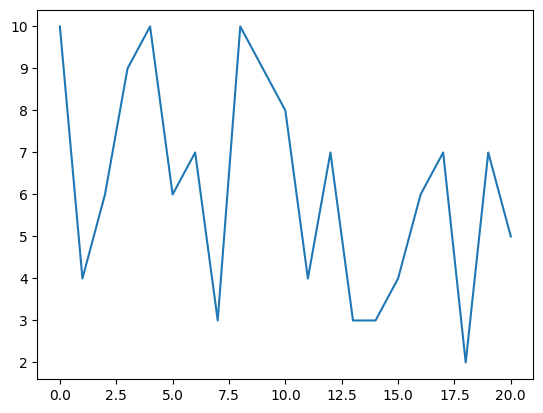

In [ ]:
data['Sorting Time'].plot()

<Axes: >

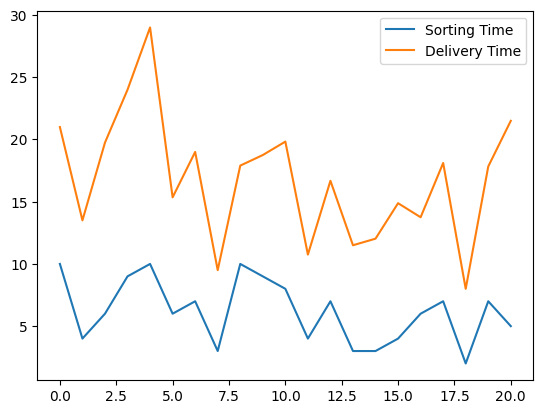

In [ ]:
data[["Sorting Time","Delivery Time"]].plot(legend=True)

Text(0, 0.5, 'Delivery time')

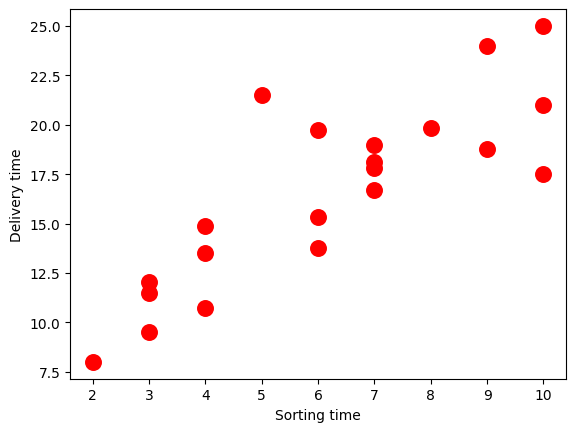

In [ ]:

plt.scatter(x,y, label='scatter plot', color='r', marker=".", s=500)
plt.xlabel('Sorting time')
plt.ylabel('Delivery time')


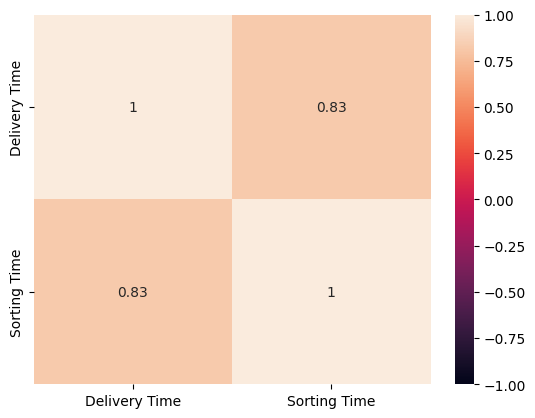

In [ ]:
sns.heatmap(data.corr(),vmin=-1,annot=True)
plt.show()

In [ ]:
X = data['Sorting Time']
X.head()

0    10
1     4
2     6
3     9
4    10
Name: Sorting Time, dtype: int64

In [ ]:
y = data['Delivery Time']
y.head()

0    21.00
1    13.50
2    19.75
3    24.00
4    29.00
Name: Delivery Time, dtype: float64

#process 1

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=12)

In [ ]:
X_train.head(3)

8     10
14     3
15     4
Name: Sorting Time, dtype: int64

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)

In [ ]:
model_train = model.fit(X_train,y_train)
print(model_train)

LinearRegression()


In [ ]:
X_test = np.array(X_test).reshape(-1, 1)

In [ ]:
pred = model_train.predict(X_test)
pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[11.0825718 ],
       [21.55022193],
       [19.80561358],
       [14.57178851],
       [11.0825718 ]])

In [ ]:
y_test

7      9.50
9     18.75
10    19.83
20    21.50
13    11.50
Name: Delivery Time, dtype: float64

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test,pred)

0.4900070537050004